### Installing Necessary Packages

In [4]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install mlxtend
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [24]:
df = pd.read_csv("./IMDB-Dataset.csv")

In [25]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
df.shape

(50000, 2)

### Preprocessing

In [27]:
df['word_counts'] = df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_word_length'] = df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stop_words_counts'] = df['review'].apply(lambda x: ps.get_stopwords_counts(x))
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [28]:
df['review_without_stopwords'] = df['review'].apply(lambda x: ps.remove_stopwords(x))

In [29]:
df.head(5)

,review,sentiment,word_counts,char_counts,avg_word_length,stop_words_counts,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. <br /><br />the...,positive,162,837,5.166667,71,wonderful little production. <br /><br />the f...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,63,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,107,"petter mattei's ""love time money"" visually stu..."


### Explatory Data Analysis

In [33]:
import seaborn as sns

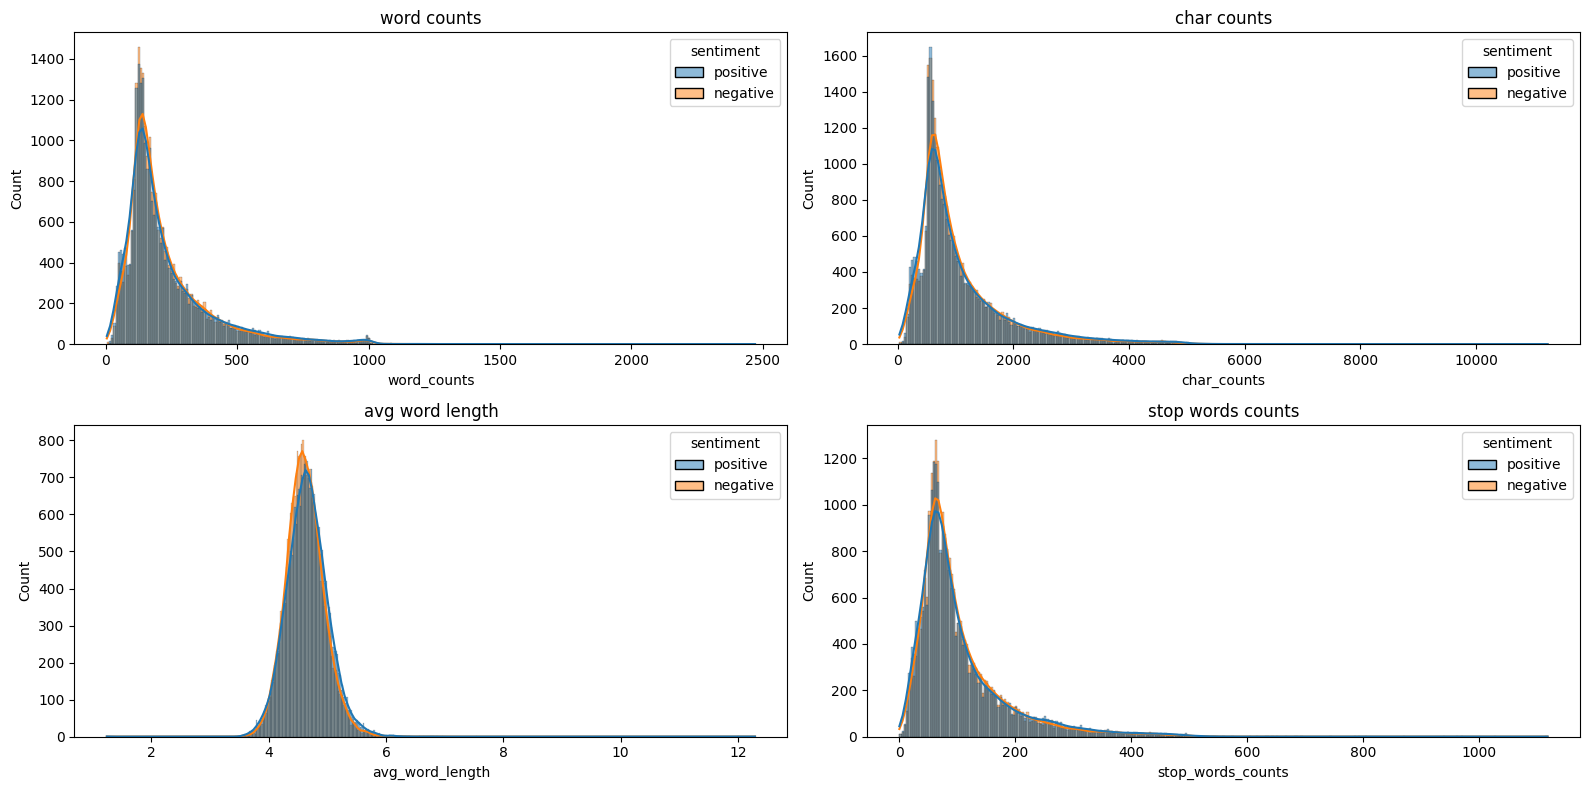

In [39]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(data=df, x="word_counts", hue="sentiment", kde=True)
plt.title("word counts")

plt.subplot(2,2,2)
sns.histplot(data=df, x="char_counts", hue="sentiment", kde=True)
plt.title("char counts")

plt.subplot(2,2,3)
sns.histplot(data=df, x="avg_word_length", hue="sentiment", kde=True)
plt.title("avg word length")

plt.subplot(2,2,4)
sns.histplot(data=df, x="stop_words_counts", hue="sentiment", kde=True)
plt.title("stop words counts")

plt.tight_layout()
plt.show()



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=0, stratify=df['sentiment'])

In [42]:
x_train.shape, x_test.shape

((40000,), (10000,))

In [45]:
clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',LinearSVC())])

In [46]:
clf.fit(x_train, y_train)

C:\Users\hp\anaconda3\envs\TF\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [47]:
y_pred = clf.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [49]:
clf.classes_

array(['negative', 'positive'], dtype=object)

In [50]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

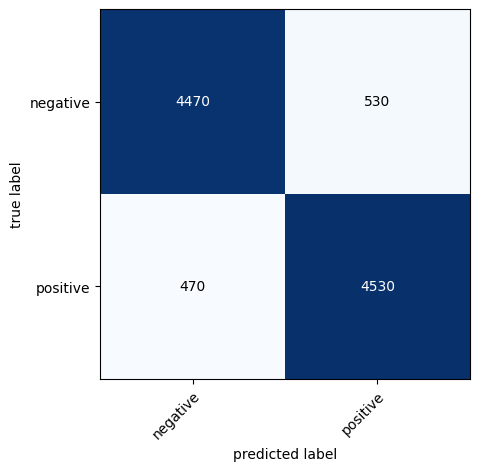

In [51]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [52]:
clf.predict(["Hi miirshe how is your today"])

array(['positive'], dtype=object)

In [54]:
clf.predict(["Hi miirshe, it's bad movies, real I don't like"])

array(['negative'], dtype=object)

In [56]:
import pickle

pickle.dump(clf, open("sentiment_analysis.pkl", "wb"))